#                                 RFM Project from Scratch



Download the Dataset From Here:[https://archive.ics.uci.edu/dataset/502/online+retail+ii](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

**Contact me:**

My name is **Rasoul Eshghi**. My main area of intrest is **Finance** and **Qunat**.

📧My Email:[cfte.mehr@gmail.com](cfte.mehr@gmail.com)

👔 Linkdin:[www.linkedin.com/in/rasoul-eshghi](www.linkedin.com/in/rasoul-eshghi)


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# read numbers easier
pd.options.display.float_format = '{:20.2f}'.format

# Show all cols on output
pd.set_option('display.max_columns', 999)

`pd.options.display.float_format`: This accesses the pandas option that controls how floating-point numbers are displayed.

`{:20.2f}.format`: This sets a formatting template where:

`20` specifies the total width of the displayed number (including decimal places and sign)

`.2` means display 2 decimal places

`f`indicates this is for floating-point numbers

`pd.set_option('display.max_columns', 999)` configures pandas to display all columns in a DataFrame when printing to the console or notebook, rather than truncating them with an ellipsis `(...)`.


`pd.set_option()`: A pandas function to modify display settings.

`display.max_columns`: The option that controls the maximum number of columns shown.

`999`: The value set (a large number ensures all columns are displayed).

## EDA (Explantory Data Analysis)

In [4]:
data = pd.read_excel(r"C:\Users\AFRAA\OneDrive\Desktop\Datasets\online_retail_II.xlsx", sheet_name=0)

data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [6]:
# Looking for data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
# Take a look at the numerical data stats
data.describe() # only for numeric data. we do sth for the 'object' format later on.

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


- What's intersting is that `Quantity` and `Price` has negative Value.
- We have `missing Data` on the customer ID

In [8]:
# look for 'object' type column stats

data.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


- It's intersting that `Invoice` doesn't consider as numebr format
- out of 525461 there are 28816 unique values are in `Invoice`


In [9]:
data[data['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


- Dealing with customers that Have no id is out of any use. for the records that doesn't have the CustomerId; I prefer to drop them.

- you can see that many of the NaN values at the `Customer ID` column has negative `Customer ID`.

In [10]:
data[data['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


- note that the letter `c` in the `Invoice` column stands for `cancellation`
- Negative might be the for the returning the goods.

In [14]:
# Let's take a look at the Invoice numbers and see whether we have different type of Invoice or not

data['Invoice'] = data['Invoice'].astype('str')
data[data['Invoice'].str.match(r'^\d{6}$') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


**Explaining the Regex pattern that I use(`r'^\d{6}$'`):**

- `r''`: Raw string (avoids escaping backslashes, e.g., \d instead of \\d).

- `^`: Asserts the start of the string.

- `\d`: Matches any digit (0-9).

- `{6}`: Exactly 6 occurrences of the preceding \d.

- `$`: Asserts the end of the string.

In [15]:
data[data['Invoice'].str.match(r'^\d{6}$') == False] # these are the canceled order

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [17]:
# Now what i Want to check is that: "Is letter 'C' is the only character that is used in the invoice column."

data['Invoice'].str.replace('[0-9]', "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

- You can see that we have record(s) that have 'A' in the Invoice

In [18]:
data[data['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


This transactions looks like pure accounting and balancing some account and they don't have any `customerID`;
so I get rid of them

In [19]:
# StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
# Let's check that

data['StockCode'] = data['StockCode'].astype('str')
data[data['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [23]:
# Let's check if there is anyother pattern for 'stockCode' beside the digit and digit with letter

data[(data['StockCode'].str.match("^\\d{5}$") == False) & (data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

You should go through this unfortunatly and check them one by one

In [25]:
data[data['StockCode'].str.contains("^DOT")] # this is the way you are gonna check all of them one-by-one

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


#### Hint:
To spare the pain for you I check them. mostly should be `Removed` from the clustering. but the only one that we can include is the `PADS`.

## Data Cleaning

In [26]:
cleaned_df = data.copy()

In [28]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_14944\1151357996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [32]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS") == True)
)
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [33]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,515252.00,515252,515252.00,407695.00
mean,10.96,2010-06-28 17:40:54.093763584,4.22,15368.50
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,13997.00
50%,3.00,2010-07-06 13:13:00,2.10,15321.00
75%,10.00,2010-10-15 14:27:00,4.21,16812.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,104.35,NaN,63.44,1679.80


In [34]:
cleaned_df.dropna(subset='Customer ID', inplace = True)

In [35]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.00,407695,407695.00,407695.00
mean,13.59,2010-07-01 10:10:10.782177792,3.29,15368.50
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:46:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.80


In [37]:
len(cleaned_df[cleaned_df['Price'] == 0])

31

In [38]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [40]:
len(cleaned_df) / len(data) 

0.7758216118798541

**Drop 23% of the Data for the sake of Data cleaning**

## Featrure Engineering

In [41]:
cleaned_df['Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_14944\3448068594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [47]:
print(list(cleaned_df.columns))

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Sales']


In [52]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index=False) \
    .agg(
        MonetaryValue = ("Sales", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,372.86,11,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,222.16,1,2010-09-27 14:59:00
3,12349.00,2671.14,3,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
5,12352.00,343.80,2,2010-11-29 10:07:00
6,12353.00,317.76,1,2010-10-27 12:44:00
7,12355.00,488.21,1,2010-05-21 11:59:00
8,12356.00,3562.25,3,2010-11-24 12:24:00
9,12357.00,12079.99,2,2010-11-16 14:29:00


In [53]:
# Date for calculating Recency
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [54]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,372.86,11,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73
3,12349.00,2671.14,3,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


## outilers Detection

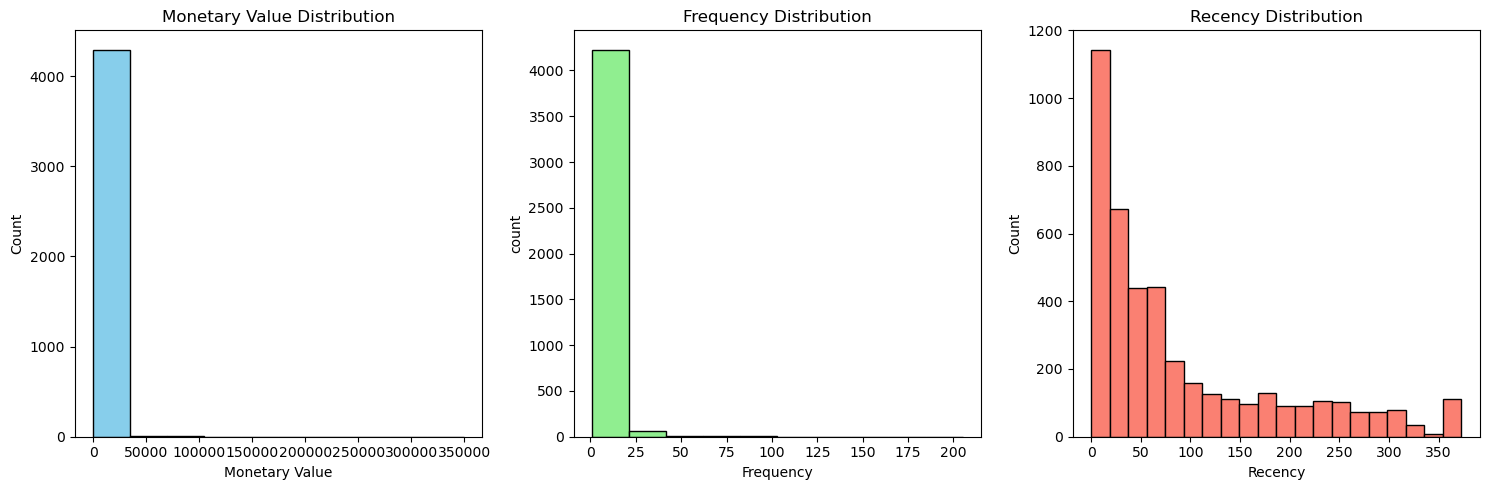

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins = 10, color = 'lightgreen', edgecolor= 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('count')


plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color= 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

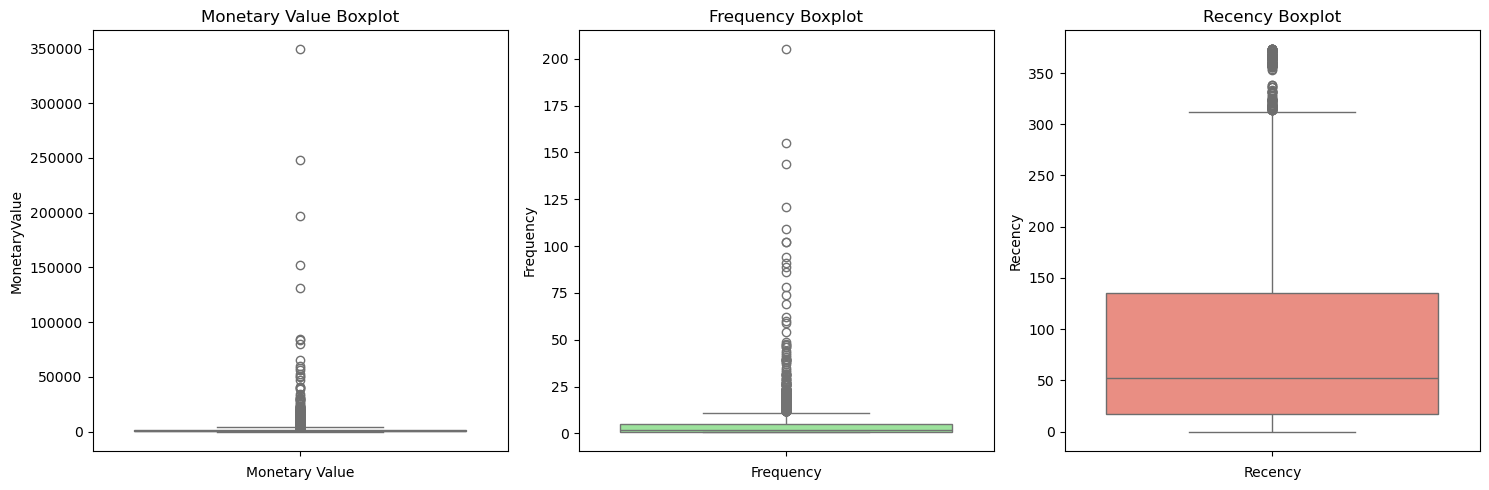

In [58]:
# Visualising Data with boxplot

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

In [59]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

Monetary_out = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

In [123]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequency_out = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

**Be Aware that those who spent the most; Are the those who buy more frequent**

In [126]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_out.index)) & (~aggregated_df.index.isin(Frequency_out.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3828.00,3828.00,3828.00,3828,3828.00
mean,15372.74,889.86,2.86,2010-09-02 15:28:27.931034368,97.91
min,12346.00,2.95,1.00,2009-12-01 09:55:00,0.00
25%,13910.50,281.21,1.00,2010-07-07 12:00:45,22.00
50%,15380.50,589.13,2.00,2010-10-12 12:44:30,58.00
75%,16846.25,1273.61,4.00,2010-11-17 13:09:30,155.00
max,18287.00,3817.18,11.00,2010-12-09 20:01:00,373.00
std,1693.30,824.81,2.24,NaN,98.74


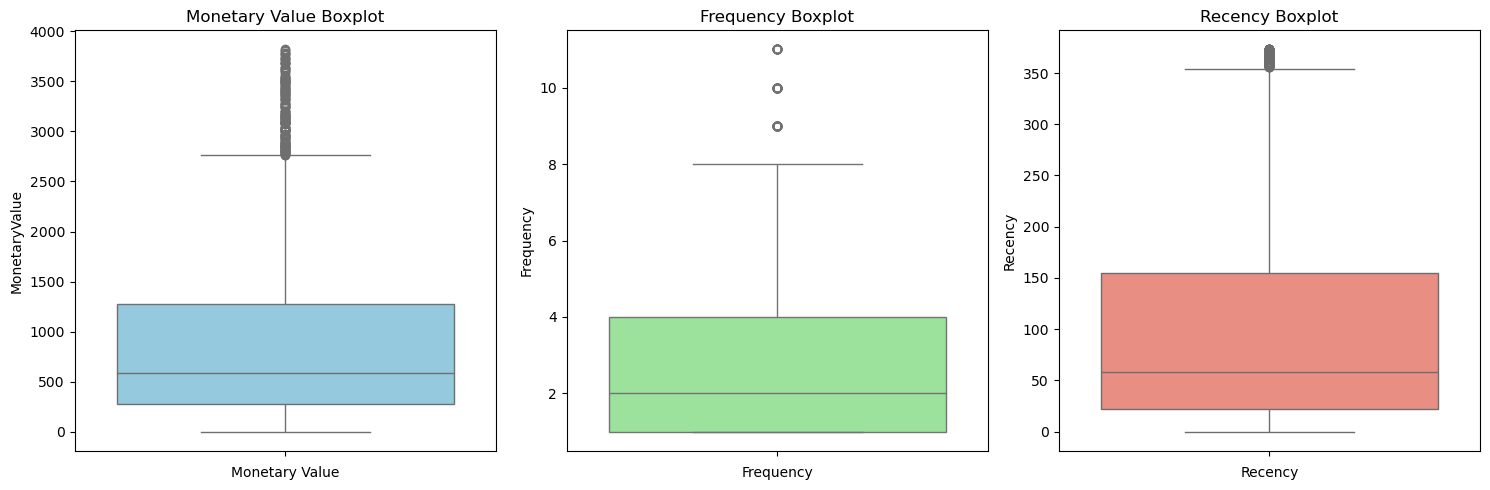

In [127]:
# Visualising Data with boxplot again

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

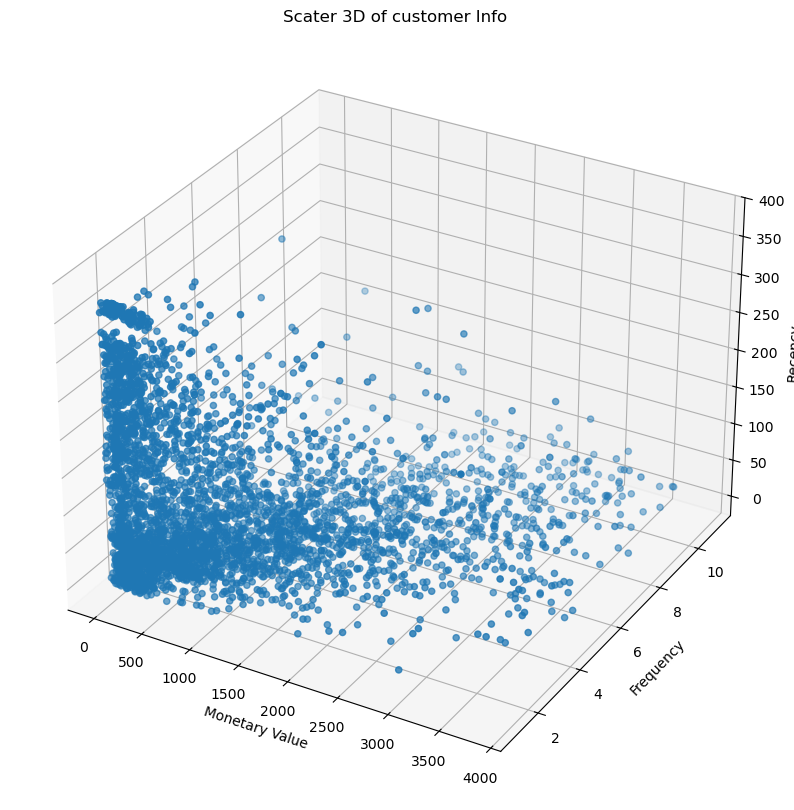

In [128]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title("Scater 3D of customer Info")
plt.show()

In [129]:
# Normalize the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency', 'Recency']])
scaled_data

array([[-0.62689958,  3.62975807,  0.66943051],
       [ 0.52559219, -0.38566835, -0.9714245 ],
       [-0.80963268, -0.83182684, -0.25228434],
       ...,
       [-0.56125147, -0.83182684,  1.99629474],
       [ 0.49298639, -0.38566835,  0.13260757],
       [ 1.76530355,  0.50664863, -0.81949348]])

In [130]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])


## Modeling(KMeans Clustering)

**The Important thing to mention is that 'K' in KMeans can be determined you can use the 'elbow methods' to define a number of clusters (AKA 'K') that is appropriate.**

The elbow method is a heuristic used in K-means clustering to determine the optimal number of clusters (K) by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" on the graph indicates the point where the rate of decrease in WCSS begins to level off, suggesting that adding more clusters doesn't significantly reduce the within-cluster variance. 

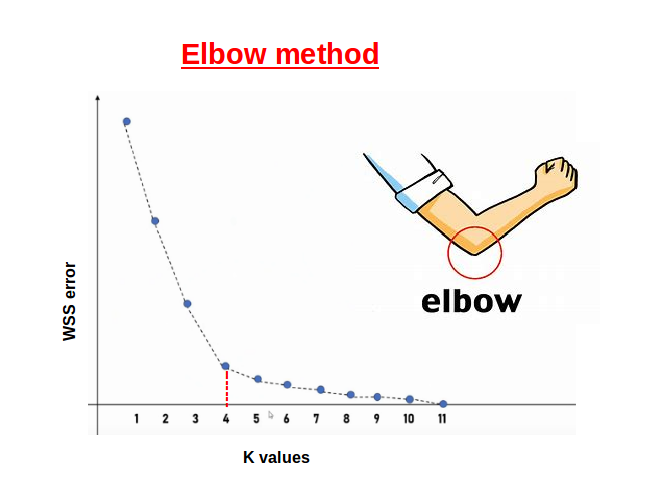

**What we are gonna do?**

Try a whole Bunch of values of K and see what the inertia is for each of those values of 'K' to determine what is the appropriate of k.

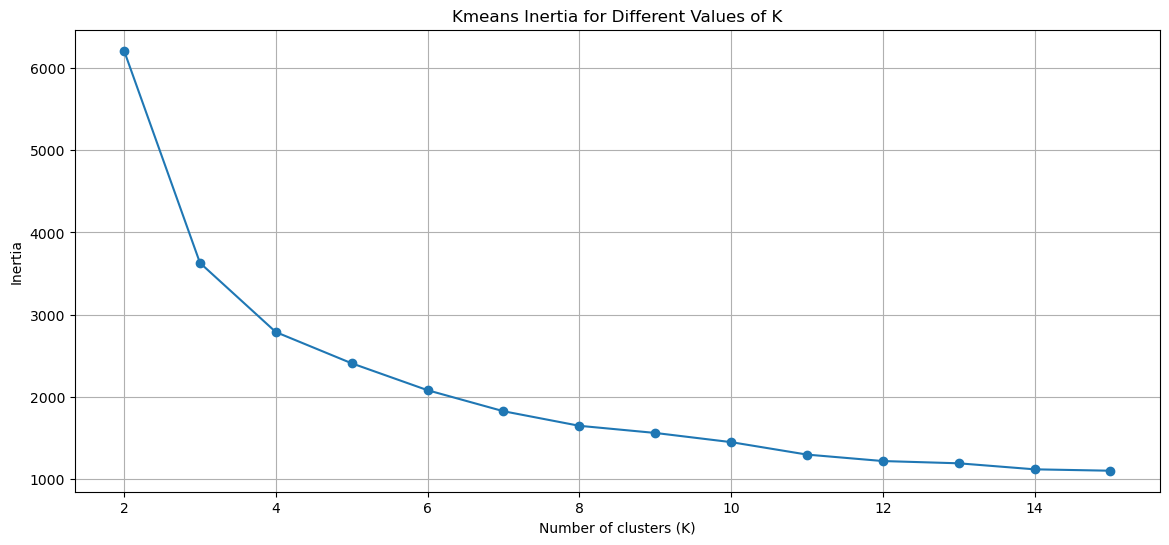

In [132]:
max_k = 15

inertia = []

k_vals = range(2, max_k + 1)

for k in k_vals:
    kmeans = KMeans(n_clusters= k , random_state= 50, max_iter=1000)
    
    kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.plot(k_vals, inertia, marker = 'o')
plt.title('Kmeans Inertia for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Using the 'Elbow Method' it is good to use the 5 or 4 clusters. any number of clusters more than that is literaly useless.**

This time here i'm gonna use the **Silhoutte score** to optimize the K selection

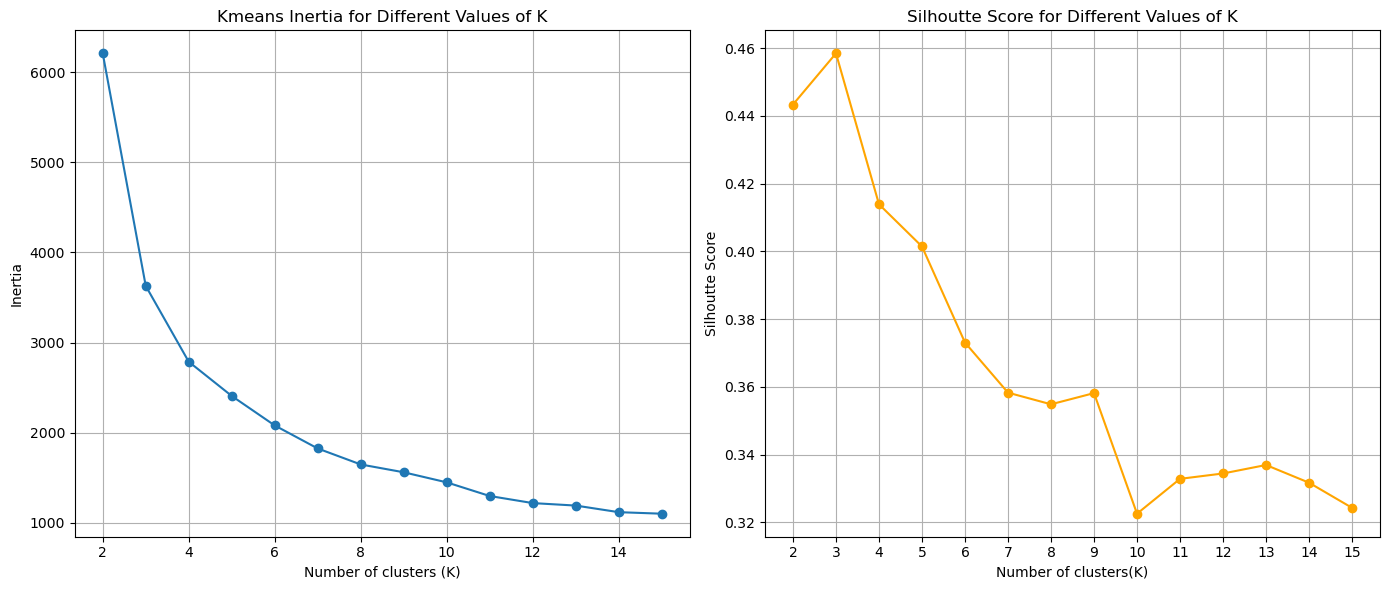

In [133]:
max_k = 15

inertia = []
silhoutte_scores = []
k_vals = range(2, max_k + 1)

for k in k_vals:
    kmeans = KMeans(n_clusters= k , random_state= 50, max_iter=1000)
    
    cluster_label = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_label)
    
    silhoutte_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_vals, inertia, marker = 'o')
plt.title('Kmeans Inertia for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_vals, silhoutte_scores, marker ='o', color = 'orange')
plt.title('Silhoutte Score for Different Values of K')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Silhoutte Score')
plt.xticks(k_vals)
plt.grid(True)

plt.tight_layout()
plt.show()

**Looking at the Silhoutte score, you can see that the K = 4 has slightly higher Silhoutte than K = 5;
meaning that 4 clusters have less potential overlap.**

In [134]:
kmeans = KMeans(n_clusters= 4, random_state= 50, max_iter=1000)

cluster_label = kmeans.fit_predict(scaled_data_df)

cluster_label

array([2, 1, 3, ..., 0, 1, 1])

In [135]:
non_outliers_df['Cluster'] = cluster_label
non_outliers_df

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_14944\2838725790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_label


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,222.16,1,2010-09-27 14:59:00,73,3
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4307,18283.00,641.77,6,2010-11-22 15:30:00,17,1
4308,18284.00,461.68,1,2010-10-04 11:33:00,66,3
4309,18285.00,427.00,1,2010-02-17 10:24:00,295,0
4310,18286.00,1296.43,2,2010-08-20 11:57:00,111,1


## Visualize the Data

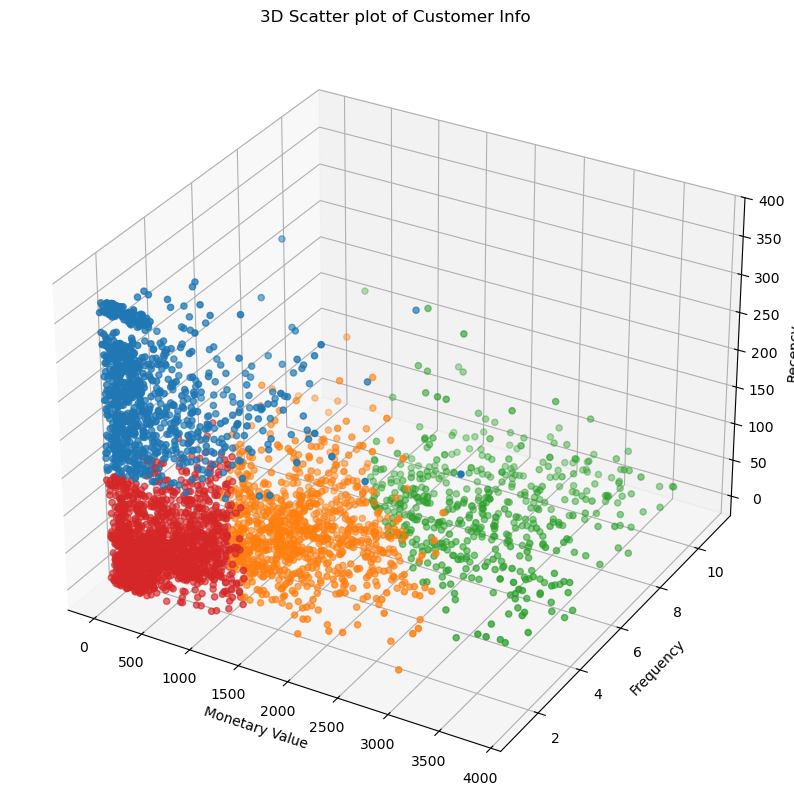

In [136]:
cluster_colors = {
    0:'#1f77b4', # Blue
    1:'#ff7f0e', # red
    2:'#2ca02c', # green
    3:'#d62728', # Red
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                    non_outliers_df['Frequency'],
                    non_outliers_df['Recency'],
                    c = colors,
                    marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter plot of Customer Info')

plt.show()

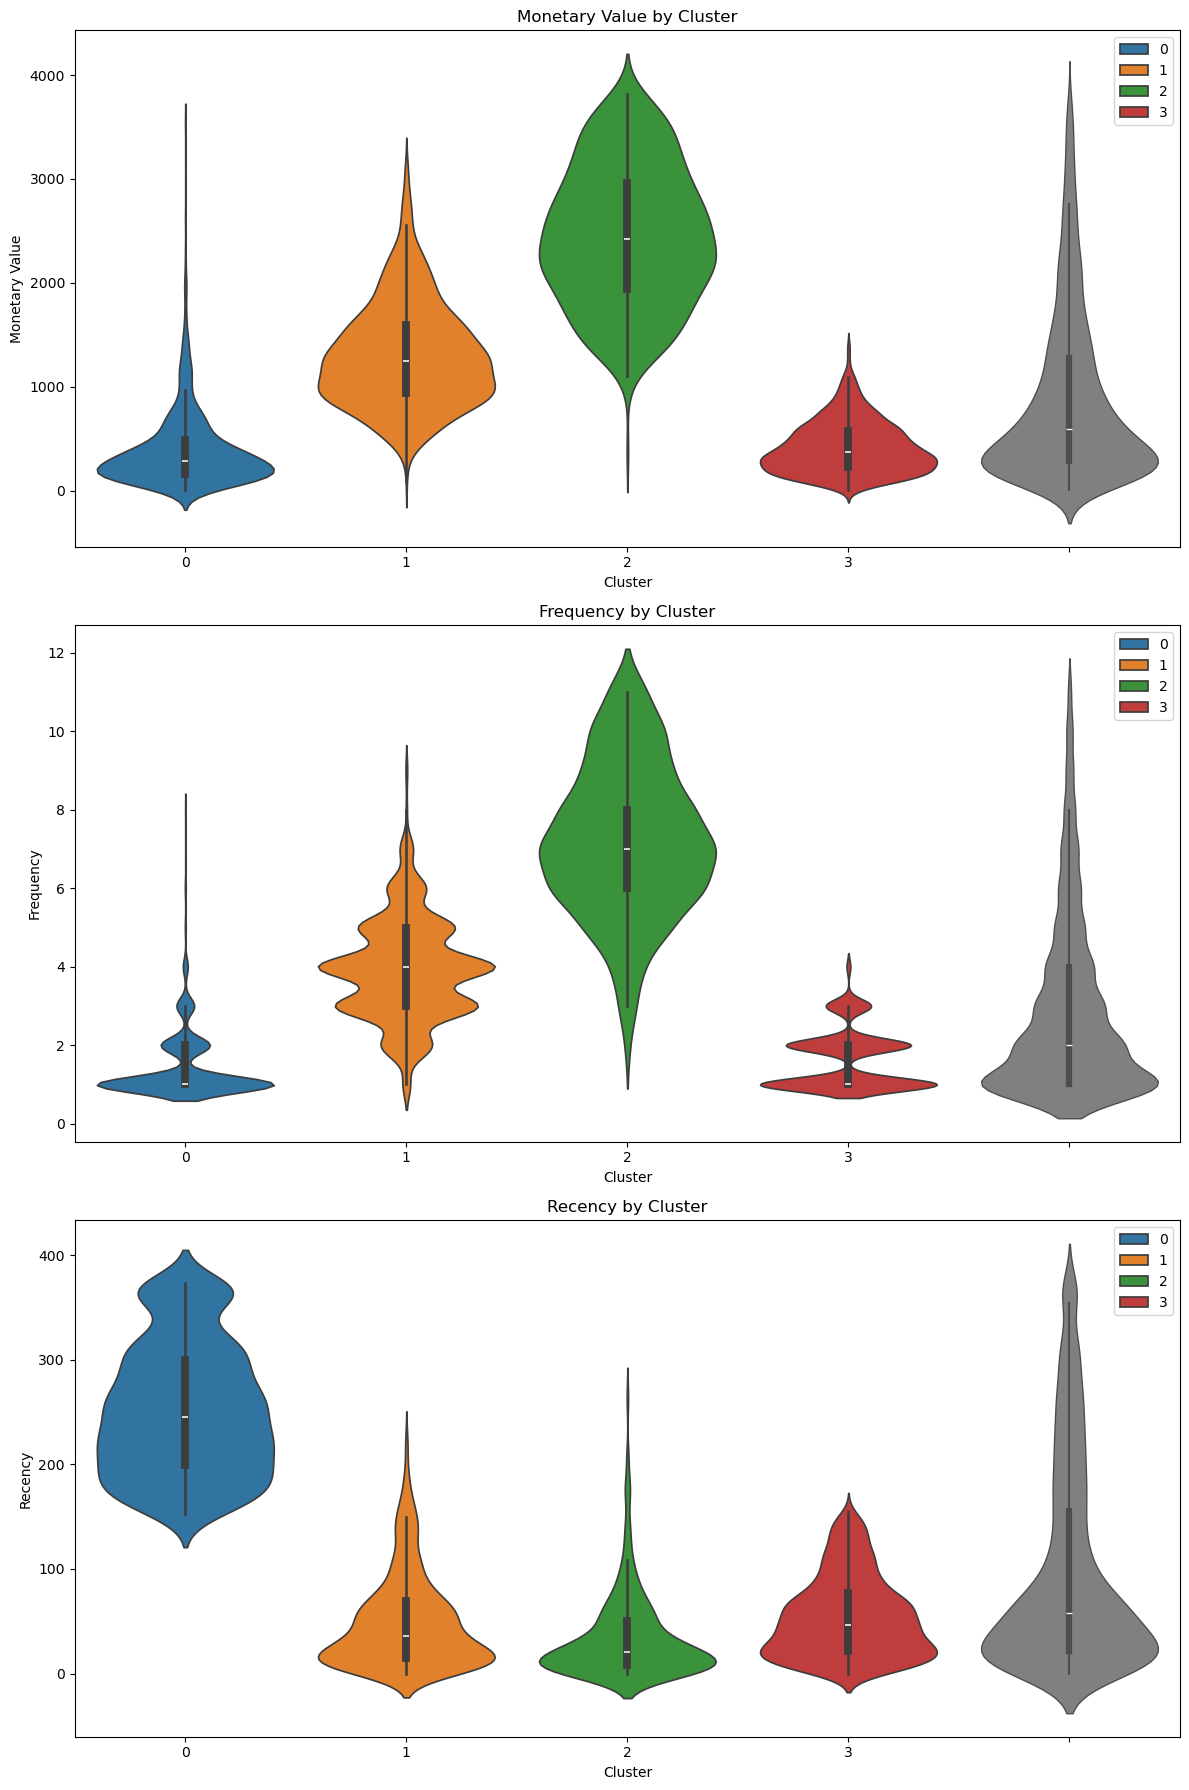

In [137]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['MonetaryValue'], palette = cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['MonetaryValue'],color='gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Frequency'], palette = cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Frequency'],color='gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Recency'], palette = cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'],color='gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Cluster 0 (Blue): "Slipping Champions"**


**Rationale**: This group consists of customers with high monetary value but declining purchase frequency and recency. They were once loyal but are showing signs of disengagement.

**Action:**

- Launch targeted win-back campaigns (e.g., "We miss you!" discounts).

- Send personalized recommendations based on past purchases.

- Conduct surveys to identify reasons for reduced activity.

**Cluster 1 (Orange): "Dormant Opportunities"**

**Rationale:**
This segment represents customers who showed initial interest but became inactive. While their past spending was limited, their latent potential makes them ideal candidates for cost-effective reactivation.

**Action:**
- Launch a 3-email win-back series with escalating incentives.
- Provide free shipping with no minimum order for their first reactivation purchase.
- Highlight "most-loved" products they previously browsed or purchased in all communications.

**Cluster 2 (Green): "Emerging Engagers"**

**Rationale:** These are new or recently reactivated customers showing initial interest but with low lifetime value. Their recent activity signals potential for growth with proper nurturing.

**Action:**

- Send a welcome sequence with product guides and a first-purchase discount.

- Encourage small repeat purchases (e.g., "Try our bestseller bundle - 15% off").

-  Prioritize fast shipping and personalized support to build trust.

**Cluster 3 (Red): "VIP Champions"**

**Rationale:** These are your highest-spending, most engaged customers who drive significant revenue through frequent purchases. Their loyalty delivers outsized value to your business.

**Action:**

- Tiered Rewards: Launch an elite loyalty tier with escalating benefits (e.g., double points, early access)

- Offer non-discount rewards (e.g., VIP events, personalized gifts)

- Assign dedicated account managers for high-value members to preempt churn

### Outliers Customers

- **In here we are gonna focus on the customer with High Frequency and Monetary Values.**
- **Also Consider the Overlap of the two.** (Those who have High Monetary Values might Buy more Frequent)

In [140]:
overlap_indecies = Monetary_out.index.intersection(Frequency_out.index)

monetary_only_outliers = Monetary_out.drop(overlap_indecies)
frequency_only_outliers = Frequency_out.drop(overlap_indecies)
monetary_and_frequency_outliers = Monetary_out.loc[overlap_indecies]

In [141]:
# Manully assign Cluster labels to each of these manual clusters
monetary_only_outliers['Cluster'] = - 1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

In [143]:
# Union the outliers clusters
outliers_df = pd.concat([monetary_only_outliers,frequency_only_outliers, monetary_and_frequency_outliers])

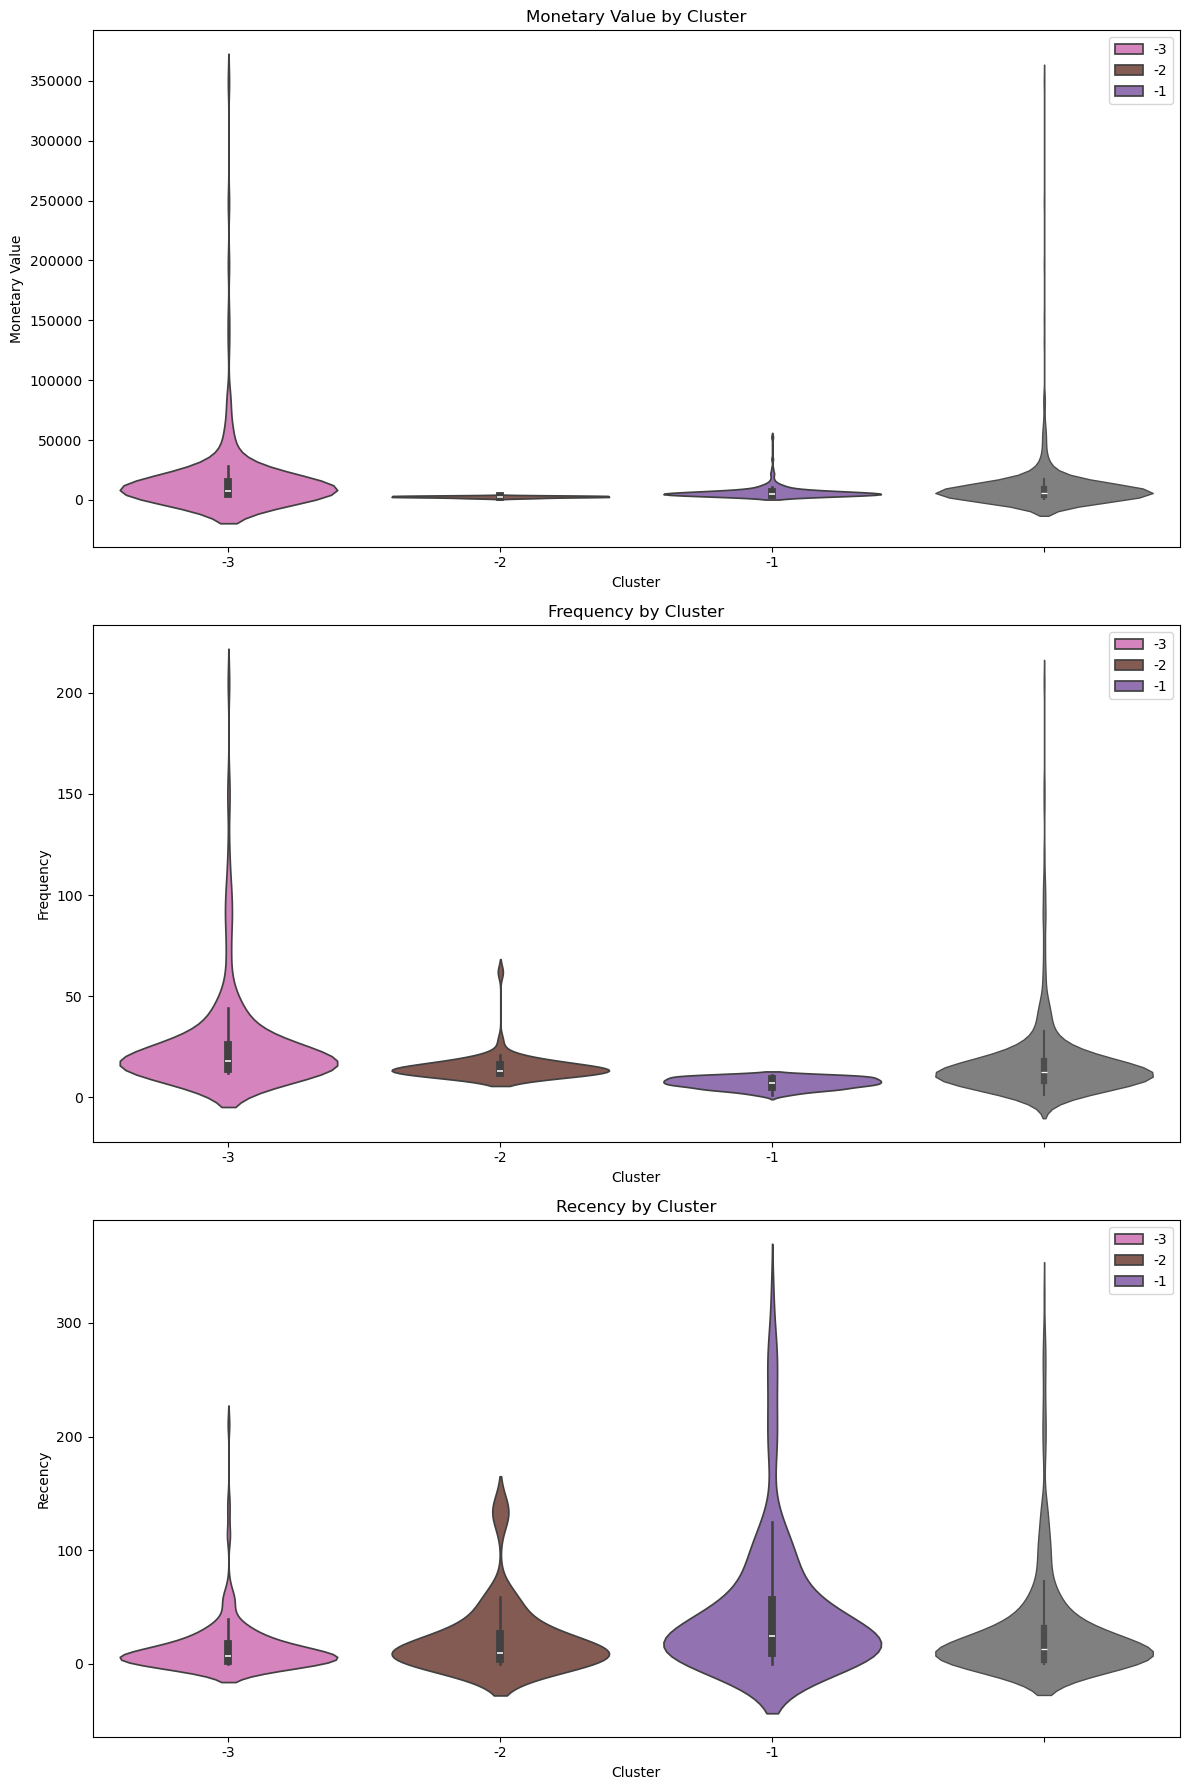

In [144]:
cluster_colors = {
    -1:'#9467bd', # purple
    -2:'#8c564b', # brown
    -3:'#e377c2', # Pink
}



plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['MonetaryValue'], palette = cluster_colors, hue = outliers_df['Cluster'])
sns.violinplot(y = outliers_df['MonetaryValue'],color='gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['Frequency'], palette = cluster_colors, hue = outliers_df['Cluster'])
sns.violinplot(y = outliers_df['Frequency'],color='gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['Recency'], palette = cluster_colors, hue = outliers_df['Cluster'])
sns.violinplot(y = outliers_df['Recency'],color='gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Cluster -1 (purple): "Premium Spenders"**

Spends too much but infrequently. they might into purchasing large stuff.


**Action:**
- Focus on maintaining the loyalty.
- Seasonal and Personalized Offers.

**Cluster -1 (brown): "Frequent Checkers"**

Spends less but check frequently.they might be looking for upselling oppritunities.


**Action:**
- Focus on having their frequent engagment.
- consider more strategies to increase their purchasing power.

**Cluster -1 (Pink): "Titans"**

Spends too much and frequently.they are golden outliers and requires more attention


**Action:**
- Develop VIP programs.
- Consider additional gifts and Special Customer Service.

## Add Clusters to data

In [148]:
cluster_label = {
    0:'Slipping Champions',
    1:'Dormant Opportunities',
    2:'Emerging Engagers',
    3:'VIP Champions',
    -1:'Premium Spenders',
    -2:'Frequent Checkers',
    -3:'Titans'
}

In [150]:
# Union outliers and non-outliers
full_df = pd.concat([non_outliers_df, outliers_df])

full_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11,2010-06-28 13:53:00,164,2
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,222.16,1,2010-09-27 14:59:00,73,3
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3


In [152]:
full_df['ClusterLabel'] = full_df['Cluster'].map(cluster_label)

full_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Label,ClusterLabel
0,12346.00,372.86,11,2010-06-28 13:53:00,164,2,Emerging Engagers,Emerging Engagers
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1,Dormant Opportunities,Dormant Opportunities
2,12348.00,222.16,1,2010-09-27 14:59:00,73,3,VIP Champions,VIP Champions
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,1,Dormant Opportunities,Dormant Opportunities
4,12351.00,300.93,1,2010-11-29 15:23:00,10,3,VIP Champions,VIP Champions
...,...,...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Titans,Titans
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Titans,Titans
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Titans,Titans
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3,Titans,Titans


## Final Visualization

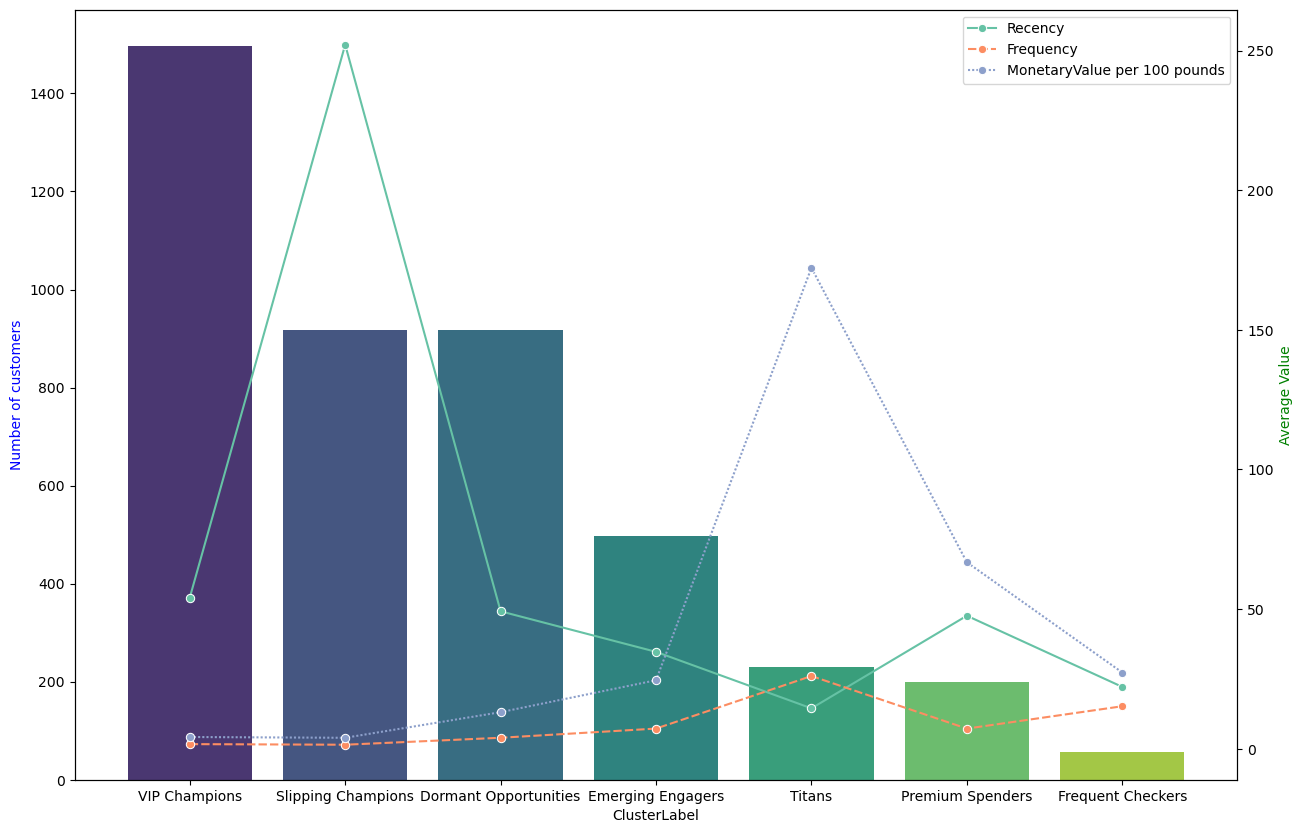

In [168]:
cluster_count = full_df['ClusterLabel'].value_counts()
full_df['MonetaryValue per 100 pounds'] = full_df['MonetaryValue'] / 100.00
feature_means = full_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(15, 10))

sns.barplot(x = cluster_count.index, y=cluster_count.values, ax = ax1, palette='viridis', hue= cluster_count.index)
ax1.set_ylabel('Number of customers', color = 'b')
ax1.set_title = ('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data = feature_means,ax= ax2, palette='Set2', marker = 'o')
ax2.set_ylabel('Average Value', color = 'g')

plt.show()